# scikit-learn中的SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]
axis = [4.2, 7.2, 1.8, 4.6]

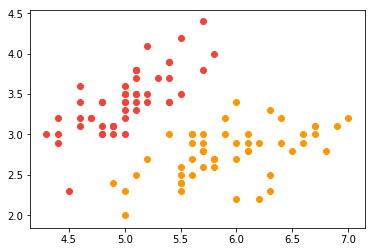

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="#f44336")
plt.scatter(X[y==1, 0], X[y==1, 1], color="#ff9800")
plt.show()

In [4]:
def plot_svc_decision_boundary(model, axis):
    cx = np.linspace(axis[0], axis[1], 100*(axis[1]-axis[0]))
    cy = np.linspace(axis[2], axis[3], 100*(axis[3]-axis[2]))
    CX, CY = np.meshgrid(cx, cy)

    new_X = np.c_[CX.ravel(), CY.ravel()]
    CZ = model.predict(new_X).reshape(CX.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#f9a19a", "#ffcb7f"])
    plt.contourf(CX, CY, CZ, linewidth=5, cmap=custom_cmap)
    
    A, B, C = model.coef_[0, 0], model.coef_[0, 1], model.intercept_[0]
    up_y = -(cx * A + C + 1) / B
    down_y = -(cx * A + C - 1) / B
    plt.plot(cx, up_y, color="#f44336")
    plt.plot(cx, down_y, color="#ff9800")
    plt.axis(axis)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

std_scaler = StandardScaler()
std_scaler.fit(X)
X_standard = std_scaler.transform(X)

/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


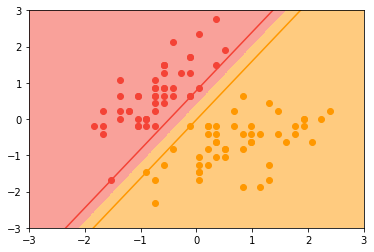

1.0

In [7]:
svm_clf = LinearSVC(C=1e9)
svm_clf.fit(X_standard, y)

plot_svc_decision_boundary(svm_clf, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color="#f44336")
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color="#ff9800")
plt.show()

svm_clf.score(X_standard, y)

/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


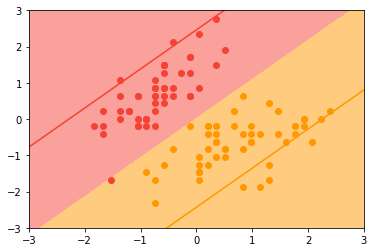

0.98999999999999999

In [9]:
svm_clf = LinearSVC(C=1e-2)
svm_clf.fit(X_standard, y)

plot_svc_decision_boundary(svm_clf, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color="#f44336")
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color="#ff9800")
plt.show()

svm_clf.score(X_standard, y)